## Goodness E. Adesokan
## ADMN5016 Final Project

## Data Description
This machine learning model predicts the job salaries of data scientists based on a combination of features. These features include the job location, type of business ownership, industry, sector, total revenue generated by the business, competitors, job applicant's degree, employment type, the company location  and proficiency in data science software including Python, SQL, Tableau, and Power BI. My aim is to train the model to predict the salary for various data scientists job titles.
This model will be useful for businesses and organizations to get an estimate of the salary range for a broad range of data analysis positions. 

### The next question then is, How can this model help businesses save money?

If a business is looking to hire an analyst/data scientist, HR/Management could run this tool on finalists to guide the business in proposing a well fitting remuneration package. Consequently, this means that a business would not pay more for the quality of employee it is getting. 
On a flip side is the benefit to job applicants. Getting a fair and competitive package is often a challenge. This model would guide applicants to have an estimate of salary ranges that are obtainable in the industry/sector. Hence, they have a better understanding of where to apply, and how best to negotiate the salary offer upon successful fulfilment of the necessary job requirements.


## Project Outline
1. Download the dataset
2. Exploratory Data Analysis
3. Prepare dataset for machine learning
4. Predictive Analytics
5. Feature Engineering
6. Train and Evaluate Different Models
7. Tune the hyperparameters for the best models
8. Post notebook on Github

## 1. Download the dataset
1. Install all required libraries
2. Download dataset from Kaggle
3. Explore the dataset size, shape, and descriptions
4. Load the training set with Pandas
5. Load the test set with Pandas

## Install Required Libraries

In [1]:
!pip install opendatasets xgboost pandas numpy scikit-learn --quiet

In [43]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
my_dataset_url = 'https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor'

In [4]:
od.download(my_dataset_url)

Skipping, found downloaded files in ".\data-scientist-salary-us-glassdoor" (use force=True to force download)


In [5]:
x = ".\data-scientist-salary-us-glassdoor\data_cleaned_2021.csv" 

In [7]:
mydf = pd.read_csv(x)

In [8]:
mydf.head

<bound method NDFrame.head of      index                                          Job Title  \
0        0                                     Data Scientist   
1        1                          Healthcare Data Scientist   
2        2                                     Data Scientist   
3        3                                     Data Scientist   
4        4                                     Data Scientist   
..     ...                                                ...   
737    950           Sr Scientist, Immuno-Oncology - Oncology   
738    951                               Senior Data Engineer   
739    952  Project Scientist - Auton Lab, Robotics Institute   
740    953                               Data Science Manager   
741    955          Research Scientist – Security and Privacy   

                 Salary Estimate  \
0     $53K-$91K (Glassdoor est.)   
1    $63K-$112K (Glassdoor est.)   
2     $80K-$90K (Glassdoor est.)   
3     $56K-$97K (Glassdoor est.)   
4    $86K

In [9]:
mydf.shape

(742, 42)

In [10]:
mydf.describe()

,index,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,...,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,...,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
for selected_cols in mydf.columns:
    print(selected_cols)

index
Job Title
Salary Estimate
Job Description
Rating
Company Name
Location
Headquarters
Size
Founded
Type of ownership
Industry
Sector
Revenue
Competitors
Hourly
Employer provided
Lower Salary
Upper Salary
Avg Salary(K)
company_txt
Job Location
Age
Python
spark
aws
excel
sql
sas
keras
pytorch
scikit
tensor
hadoop
tableau
bi
flink
mongo
google_an
job_title_sim
seniority_by_title
Degree


In [12]:
dtypes = {
    'index': 'int64',
    'Job Title': 'O',
    'Salary Estimate': 'O',
    'Job Description': 'O',
    'Rating' : 'float64',
    'Company Name' : 'O', 
    'Location' : 'O',
    'Headquarters' : 'O',
    'Size' : 'O',
    'Founded' : 'int64',
    'Type of ownership' : 'O',
    'Industry' : 'O',
    'Sector': 'O',
    'Revenue': 'O',
    'Competitors': 'O',
    'Hourly': 'int64',
    'Employer provided' : 'int64',
    'Lower Salary': 'int64',
    'Upper Salary': 'int64',
    'Avg Salary(K)': 'float64',
    'company_txt': 'O',
    'Job Location': 'O',
    'Age': 'int64',
    'Python': 'int64',
    'spark': 'int64',
    'aws' : 'int64', 
    'excel' : 'int64',
    'sql' : 'int64',
    'sas' : 'int64',
    'keras' : 'int64',
    'pytorch' : 'int64',
    'scikit' : 'int64',
    'tensor' : 'int64',
    'hadoop' : 'int64',
    'tableau' : 'int64',
    'bi' : 'int64',
    'flink' : 'int64',
    'mongo' : 'int64',
    'google_an' : 'int64',
    'job_title_sim' : 'O',
    'seniority_by_title' : 'O',
    'Degree': 'O'
                                  }

## Data Cleaning and Sorting

In [13]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [14]:
mydf['seniority'] = mydf['Job Title'].apply(seniority)
mydf.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [16]:
def Degree(title):
    if 'M' in title.lower():
            return 'masters'
    elif 'P' in title.lower():
        return 'postsecondary'
    else:
        return 'na'

In [17]:
mydf.Degree.value_counts()

na    383
M     252
P     107
Name: Degree, dtype: int64

## Visualizations and Exploratory Data Analysis

<AxesSubplot:>

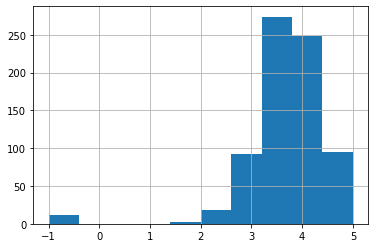

In [18]:
mydf.Rating.hist()

<AxesSubplot:>

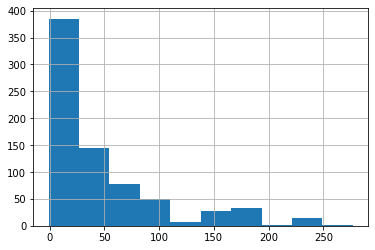

In [19]:
mydf.Age.hist()

<AxesSubplot:>

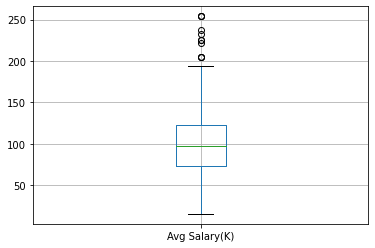

In [20]:
mydf.boxplot(column = 'Avg Salary(K)')

In [21]:
mydf[['Age', 'Avg Salary(K)','Rating','Upper Salary', 'Lower Salary']].corr()

,Age,Avg Salary(K),Rating,Upper Salary,Lower Salary
Age,1.000000,0.022076,0.023162,0.034607,0.003010
Avg Salary(K),0.022076,1.000000,0.012475,0.990032,0.978679
Rating,0.023162,0.012475,1.000000,0.027332,-0.009638
Upper Salary,0.034607,0.990032,0.027332,1.000000,0.939995
Lower Salary,0.003010,0.978679,-0.009638,0.939995,1.000000


The visualizations below are glean some insight from the categorical variables.

In [26]:
mydf_categorical = mydf[['Size', 'Type of ownership', 'Sector', 'Revenue', 'Python', 'sql',
       'spark', 'aws', 'excel', 'pytorch', 'seniority']]

graph for Size: total = 8


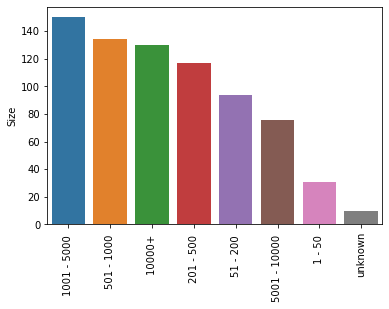

graph for Type of ownership: total = 9


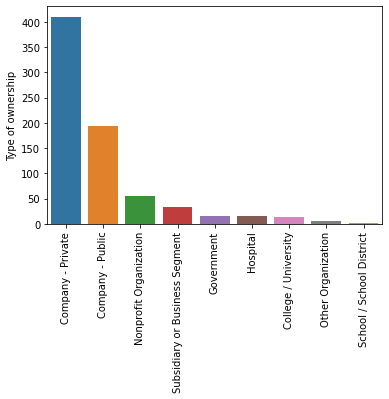

graph for Sector: total = 25


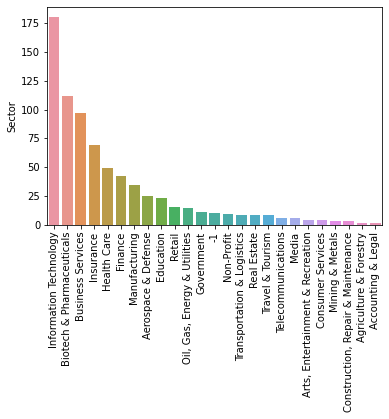

graph for Revenue: total = 13


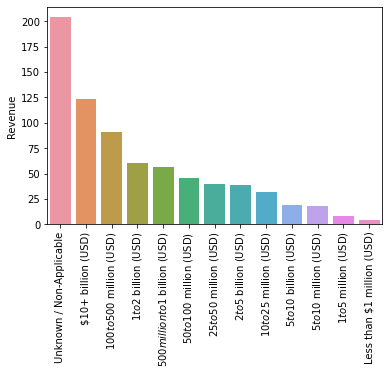

graph for Python: total = 2


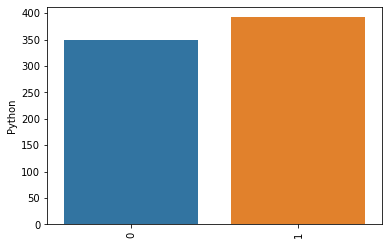

graph for sql: total = 2


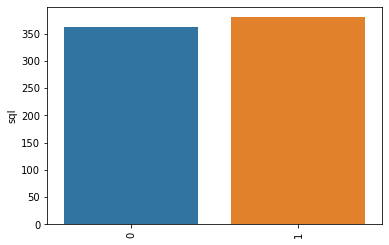

graph for spark: total = 2


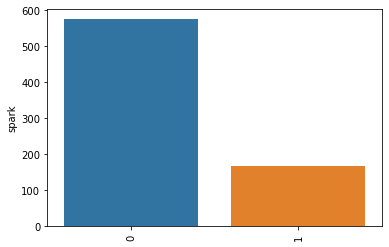

graph for aws: total = 2


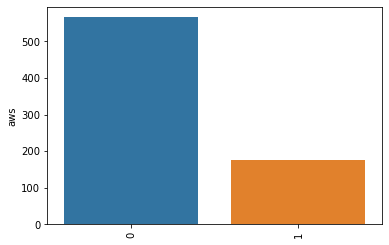

graph for excel: total = 2


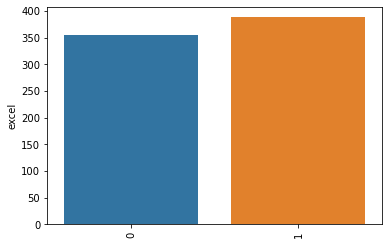

graph for pytorch: total = 2


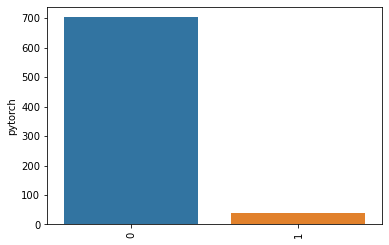

graph for seniority: total = 3


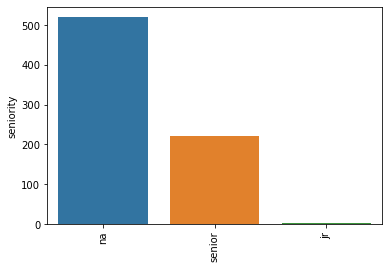

In [27]:
for i in mydf_categorical.columns:
    cat_num = mydf_categorical[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Split 75% as training dataset
# and 25% as testing dataset (we will also use this as Validation data)
train_df, test_df = train_test_split(mydf, test_size=0.25,random_state=0)

In [30]:
len(train_df), len(test_df)

(556, 186)

## Check for Missing Values

In [31]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [32]:
len(train_df), len(test_df) 
#No missing value in the dataset

(556, 186)

## Extract Inputs and Outputs

In [33]:
input_cols = ['Founded', 'Age', 'Python', 'sql', 'tableau', 'bi', 'Hourly', 'Employer provided', 'spark', 'aws', 'excel', 'sas', 'keras', 'scikit', 'tensor', 'pytorch']

In [34]:
target_cols = ['Avg Salary(K)']

## Training Data

In [35]:
train_inputs = train_df[input_cols]

In [36]:
train_targets = train_df[target_cols]

In [37]:
train_inputs

,Founded,Age,Python,sql,tableau,bi,Hourly,Employer provided,spark,aws,excel,sas,keras,scikit,tensor,pytorch
77,2000,21,0,0,0,0,0,0,0,1,0,0,0,0,0,0
351,1964,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0
230,-1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
266,2017,4,1,0,1,0,0,1,0,1,1,0,0,0,0,0
109,2006,15,0,0,0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1984,37,1,1,1,1,0,0,0,0,0,0,0,0,0,0
192,2013,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
629,2003,18,0,1,1,0,0,0,0,0,1,0,0,0,0,0
559,-1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [38]:
train_targets

,Avg Salary(K)
77,87.5
351,54.0
230,107.0
266,225.0
109,157.0
...,...
707,139.5
192,134.5
629,72.5
559,127.5


## Testing Data

In [39]:
test_inputs = test_df[input_cols]

In [40]:
test_targets = test_df[target_cols]

In [41]:
test_inputs

,Founded,Age,Python,sql,tableau,bi,Hourly,Employer provided,spark,aws,excel,sas,keras,scikit,tensor,pytorch
196,1986,35,0,1,1,0,0,0,0,0,1,1,0,0,0,0
187,2015,6,1,1,0,0,0,0,0,1,0,0,0,1,1,1
14,1781,240,1,1,0,0,0,0,1,0,0,0,0,0,1,0
31,1997,24,1,1,0,0,0,0,0,0,0,1,0,0,0,0
505,2011,10,1,1,1,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,-1,-1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
35,2008,13,1,1,1,1,0,0,0,0,1,0,0,0,0,0
447,2010,11,1,1,0,0,0,0,1,0,1,0,0,1,1,1
535,1989,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
test_targets

,Avg Salary(K)
196,48.5
187,133.0
14,113.5
31,96.0
505,95.0
...,...
730,120.0
35,106.0
447,107.0
535,45.5


## Train and Evaluate Hardcoded Model
### The aim here is to create a simple model that always predict the average

In [44]:
class MeanRegressor:
    def fit(self, inputs, targets):
        self.mean = targets.mean()
    def predict (self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [46]:
mean_model = MeanRegressor()
mean_model.fit(train_inputs, train_targets)

In [47]:
mean_model.mean

Avg Salary(K)    101.978417
dtype: float64

In [48]:
train_preds = mean_model.predict(train_inputs)
train_preds

array([101.97841727, 101.97841727, 101.97841727, 101.97841727,
       101.97841727, 101.97841727, 101.97841727, 101.97841727,
       101.97841727, 101.97841727, 101.97841727, 101.97841727,
       101.97841727, 101.97841727, 101.97841727, 101.97841727,
       101.97841727, 101.97841727, 101.97841727, 101.97841727,
       101.97841727, 101.97841727, 101.97841727, 101.97841727,
       101.97841727, 101.97841727, 101.97841727, 101.97841727,
       101.97841727, 101.97841727, 101.97841727, 101.97841727,
       101.97841727, 101.97841727, 101.97841727, 101.97841727,
       101.97841727, 101.97841727, 101.97841727, 101.97841727,
       101.97841727, 101.97841727, 101.97841727, 101.97841727,
       101.97841727, 101.97841727, 101.97841727, 101.97841727,
       101.97841727, 101.97841727, 101.97841727, 101.97841727,
       101.97841727, 101.97841727, 101.97841727, 101.97841727,
       101.97841727, 101.97841727, 101.97841727, 101.97841727,
       101.97841727, 101.97841727, 101.97841727, 101.97

In [49]:
#Compare with the train_targets. The values are off as we would expect
train_targets

,Avg Salary(K)
77,87.5
351,54.0
230,107.0
266,225.0
109,157.0
...,...
707,139.5
192,134.5
629,72.5
559,127.5


## But how badly are we really doing? Let us now perform some evaluation

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
def rmse (targets, preds): 
    return mean_squared_error(targets, preds, squared = False)

In [52]:
train_rmse = rmse(train_targets, train_preds)
train_rmse

37.387715372890945

### Our estimated average salary is off by 37,388 Dollars (recall that Avg Salary(K) means 000s). 
### The model definitely needs to do better!

## Train and Evaluate a Reference Model using Multiple Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
linear_model = LinearRegression()
linear_model.fit(train_inputs, train_targets)

LinearRegression()

In [55]:
train_preds = linear_model.predict(train_inputs)
train_preds

array([[105.54937593],
       [ 94.25586151],
       [ 83.41575591],
       [161.44397258],
       [109.37271444],
       [ 92.95537281],
       [103.95360918],
       [ 80.18515948],
       [106.36494421],
       [ 98.50756524],
       [ 84.5490557 ],
       [123.00880843],
       [120.22645207],
       [ 92.31280706],
       [ 80.61901566],
       [ 80.20046643],
       [132.75547421],
       [ 93.15366455],
       [ 46.29012837],
       [133.60703757],
       [109.18004945],
       [115.40656934],
       [110.94025489],
       [ 76.61795915],
       [133.60703757],
       [120.41911706],
       [ 93.29770531],
       [ 80.71534816],
       [ 87.92757527],
       [103.39056121],
       [ 48.74660701],
       [132.53005586],
       [ 98.90480253],
       [ 78.96605629],
       [120.6599483 ],
       [106.0737708 ],
       [ 82.78649682],
       [ 80.47451692],
       [114.97307311],
       [ 98.54265757],
       [114.63590937],
       [135.75927198],
       [113.87839601],
       [118

In [56]:
train_targets

,Avg Salary(K)
77,87.5
351,54.0
230,107.0
266,225.0
109,157.0
...,...
707,139.5
192,134.5
629,72.5
559,127.5


In [57]:
rmse(train_targets, train_preds)

32.39708944131249

### Still a long way to go. What else can we do?
### Feature Engineering
Experience level would have been a great option for this analysis. However, this is not a column in this dataset.

## Train and Evaluate Different Models
1. Ridge Regression
2. Random Forests
3. Gradient Boosting

In [58]:
train_df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree', 'seniority'],
      dtype='object')

In [59]:
input_cols = ['Founded', 'Age', 'Python', 'sql', 'tableau', 'bi', 'Hourly', 'Employer provided', 'spark', 'aws', 'excel', 'sas', 'keras', 'scikit', 'tensor', 'pytorch']

In [60]:
target_cols = 'Avg Salary(K)'

In [61]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_cols]

In [ ]:
test_inputs = test_df[input_cols]
test_targets = test_df[target_cols]

### Define a helper function to evaluate the models. This makes the model building easier. 

In [62]:
def evaluate(model, train_inputs):
    train_preds = model.predict(train_inputs)
    train_rmse = rmse(train_targets, train_preds)
    test_preds = model.predict(test_inputs)
    test_rmse = rmse(test_targets, test_preds)
    return train_rmse, test_rmse, train_preds, test_preds

## Ridge Regression

In [63]:
from sklearn.linear_model import Ridge

In [64]:
model1 = Ridge(random_state = 30, alpha = 0.1)

In [65]:
model1.fit(train_inputs, train_targets)

Ridge(alpha=0.1, random_state=30)

In [66]:
evaluate(model1, train_inputs)
#We see that prediction is not improved

(32.397201392728924,
 33.7500137156036,
 array([105.50713636,  94.23515996,  83.51752138, 161.00585721,
        109.34754414,  92.9354611 , 103.94690723,  80.22434443,
        106.34419683,  98.52615837,  84.50569209, 122.9527869 ,
        120.21457929,  92.32785748,  80.61446838,  80.23755217,
        132.72811998,  93.17555872,  46.64603695, 133.62956909,
        109.15499616, 115.41961136, 110.94342507,  76.63782937,
        133.62956909, 120.40712727,  93.27178855,  80.71074237,
         87.96217863, 103.42558004,  49.10102369, 132.48515978,
         98.93051226,  78.96460282, 120.64781224, 106.12455115,
         82.78063315,  80.4700574 , 114.9863784 ,  98.5193525 ,
        114.64941944, 135.69742841, 113.87978176, 118.01082933,
        120.65836405,  94.52398193, 104.59253346, 124.21927565,
        128.4779895 , 112.77582258,  96.20613046,  91.82831022,
        108.58150216,  86.98520529,  92.397732  ,  88.07570259,
        109.15499616,  87.96217863,  91.81152516, 113.80970304,


## Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
model2 = RandomForestRegressor(random_state = 42, n_jobs = -1, max_depth = 10, n_estimators = 100)

In [69]:
%%time
model2.fit(train_inputs, train_targets)

Wall time: 155 ms


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [71]:
evaluate(model2, train_inputs)

(16.589404522669227,
 31.496319959862372,
 array([ 94.61408243,  71.90030542,  97.81354956, 205.5225    ,
        140.96229534,  65.26117507,  88.38119533,  98.74976712,
         71.05918463,  89.53757684,  56.15555556,  98.50366426,
        196.92733586,  74.52210108, 131.50778362,  88.3830393 ,
        118.01374858, 107.68182559,  50.14855347, 139.32849537,
        139.7217874 , 112.33924327, 115.92575718,  59.3237509 ,
        139.32849537, 100.08634322,  62.27440558, 105.4131651 ,
         87.94772348, 149.56361508,  63.56968935, 143.23354498,
        139.11486692,  70.62719016,  99.6405895 , 128.72704468,
        103.36472952, 121.4407361 ,  86.9850856 ,  93.1999628 ,
         92.27066545, 105.51254221, 132.05259854, 156.89699614,
         98.75633688,  78.11872949,  99.8157529 , 119.44840064,
        108.85920516, 148.13467378,  93.04227313,  86.17568018,
        114.89096237,  90.16835271, 111.11875558,  71.29571142,
        139.7217874 ,  87.94772348,  61.77176657,  84.03887195

### Better Prediction. But can it be improved?

## Gradient Boosting

In [72]:
from xgboost import XGBRegressor

In [73]:
model3 = XGBRegressor(max_depth=5, objective='reg:squarederror', n_estimators=200, random_state=30, n_jobs=-1)

In [74]:
model3.fit(train_inputs, train_targets)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=30,
             reg_alpha=0, reg_lambda=1, ...)

In [75]:
evaluate(model3, train_inputs)

(11.71405882284826,
 31.84652090911229,
 array([ 91.86928 ,  54.56054 , 104.43658 , 225.55292 , 154.58705 ,
         45.126575,  85.719894, 107.423874,  59.952908,  83.65421 ,
         55.36212 ,  96.45788 , 203.6278  ,  68.17218 , 136.62047 ,
         90.298294, 112.71122 , 118.7862  ,  42.347485, 140.56622 ,
        149.24693 , 112.93909 , 114.985825,  36.471333, 140.56622 ,
        102.54958 ,  47.934982, 107.81591 ,  89.03593 , 169.55612 ,
         65.25657 , 144.67639 , 146.06117 ,  66.897484, 101.15434 ,
        125.040596, 138.18182 , 133.97026 ,  80.373634, 102.88763 ,
         93.22057 ,  99.621346, 139.93983 , 168.41104 ,  99.18593 ,
         72.86656 ,  88.3344  , 110.712395,  85.51055 , 170.60556 ,
         79.74365 ,  85.208664, 116.7937  ,  90.74493 , 118.28126 ,
         55.517323, 149.24693 ,  89.03593 ,  51.65343 ,  76.7096  ,
        141.06653 ,  89.03593 ,  54.225452, 138.66144 ,  87.98143 ,
         54.889664, 178.7836  , 129.49997 , 145.49667 ,  99.18593 ,
        

### Gradient Boosting gave us the lowest error, and consequently the best prediction out of the three options.

## Tune Hyperparameters
Tune the most important/impactful hyperparameter first( e.g n_estimators for XGBoost). Then continue with the next most impactful hyperparameter. Better output, reduced RMSE. More hyperparameter tuning might be helpful. I need more machine learning knowledge to write the function. I am working on improving my skill on the concept of hyperparameter tuning.

## Summary
Overall, this model could be improved by using a more tailored dataset. Upon the completion of this analysis, we see that the dataset used is best suited for exploratory data analysis. It would be helpful to find a dataset suitable for machine learning, and rerun this model for better prediction.